In [1]:
# 운영 체제와 상호 작용하는 함수(예: 파일 경로 처리)를 제공하는 모듈을 불러옴.
import os

# 시간 관련 함수(예: 딜레이, 시간 측정)를 제공하는 모듈을 불러옴.
import time

# 객체를 깊은 복사(deep copy)하기 위한 모듈을 불러옴. 모델 가중치 복사 등에 유용함.
import copy

# NumPy 라이브러리를 np 별칭으로 불러옴. 배열 및 수치 연산에 사용함.
import numpy as np

# Matplotlib의 pyplot 모듈을 plt 별칭으로 불러옴. 데이터 시각화에 사용함.
import matplotlib.pyplot as plt

# PyTorch 핵심 라이브러리를 불러옴. 딥러닝 모델 구축에 사용함.
import torch

# TorchVision 라이브러리를 불러옴. 비전 관련 데이터셋과 모델 등을 제공함.
import torchvision

# 신경망 레이어(nn) 모듈을 불러옴. 모델의 구성 요소를 정의함.
import torch.nn as nn

# 옵티마이저(optim) 모듈을 불러옴. 모델 학습 시 가중치 업데이트에 사용함.
import torch.optim as optim

# 학습률 스케줄러(lr_scheduler) 모듈을 불러옴. 학습 중에 학습률을 동적으로 조정함.
from torch.optim import lr_scheduler

# TorchVision에서 데이터셋, 미리 학습된 모델, 데이터 변환(transforms) 모듈을 불러옴.
from torchvision import datasets, models, transforms

# PyTorch의 난수 생성기 시드(seed) 값을 0으로 설정했음. 결과의 재현성을 보장함.
torch.manual_seed(0)

In [ ]:
# !pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 16.5 MB/s  0:00:00a 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [kaggle]━━━━━━━━━ 10/13 [kagglesdk]


In [ ]:
# 파일 업로드 창이 열립니다. 여기서 kaggle.json 파일을 선택하여 업로드합니다.
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansikyung","key":"1d58e4a8071660387131eac2257216c0"}'}

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/         # api key 인증 키 이동
# !chmod 600 ~/.kaggle/kaggle.json   # 파일접근 권한(본인만 읽고(4) 쓰기(2) 가능하게 권한위임)

In [ ]:
# !kaggle datasets download -d ajayrana/hymenoptera-data #데이터 다운

# !unzip -q hymenoptera-data.zip -d . # 압축해제 (. : 현재 작업중인 디렉토)

Dataset URL: https://www.kaggle.com/datasets/ajayrana/hymenoptera-data
License(s): CC0-1.0
  0% 0.00/90.2M [00:00<?, ?B/s]
100% 90.2M/90.2M [00:00<00:00, 1.77GB/s]


In [ ]:
data_transformers = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221,0.230])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221,0.230])
    ])
}

In [5]:
# 데이터 셋이 위치한 root directory 이름 정의
ddir = '/home/kim/Desktop/AI_cours/hymenoptera_data'

# 학습(train)과 검증(val) 데이터셋에 적용할 이미지 전처리(transform)를 dict() 정의
data_transformers = {
    'train': transforms.Compose([
        # 데이터증강 (학습데이터만 적용)
        transforms.RandomResizedCrop(224),
        # 이미지를 무작위로 자르고 크기를 224*224 조정
        transforms.RandomHorizontalFlip(),
        # 이미지를 무작위 수평(좌우반전) 뒤집음

        transforms.ToTensor(),
        # 파이토치 텐서로 변환
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221,0.230])]
        # R,G,B 채널 별 평균과 표준편차 사용 >> 텐서를 정규화함
    ),
    'val': transforms.Compose([
        # 데이터증강 (학습데이터만 적용)
        transforms.Resize(256),
        # 이미지를 256*256 조정
        transforms.CenterCrop(224),
        # 이미지 중앙을 224*224 크기로 자름

        transforms.ToTensor(),
        # 파이토치 텐서로 변환
        transforms.Normalize([0.490, 0.449, 0.411], [0.231, 0.221,0.230])]
        # R,G,B 채널 별 평균과 표준편차 사용 >> 텐서를 정규화함
    )

}

In [6]:
# 'train'과 'val' 디렉토리에서 ImageFolder 데이터셋을 로드할게요
# 각 폴더 이름(클래스)과 이미지 매핑 >> 해당하는 전처리 적용

{k: datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in {'train', 'val'}}

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: /home/kim/Desktop/AI_cours/hymenoptera_data/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.49, 0.449, 0.411], std=[0.231, 0.221, 0.23])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: /home/kim/Desktop/AI_cours/hymenoptera_data/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.49, 0.449, 0.411], std=[0.231, 0.221, 0.23])
            )}

In [8]:
# {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True, num_workers=2)
#                    for k in {'train', 'val'}}

# {'train': torch.utils.data.DataLoader(img_data['train'], batch_size=8, shuffle=True, num_workers=2),
#              'val': torch.utils.data.DataLoader(img_data['val'], batch_size=8, shuffle=False, num_workers=2)}
# torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
img_data = {k: datasets.ImageFolder(os.path.join(ddir, k), data_transformers[k]) for k in {'train', 'val'}}

# ImageFolder 데이터 셋 활용, DataLoader 객체 생성
# batch_size = 8. 데이터 섞기 shuffle 활성화, 작업자 수(num_workers = 2) 설정

# dloaders = {k: torch.utils.data.DataLoader(img_data[k], batch_size=8, shuffle=True, num_workers=2)
#                    for k in {'train', 'val'}}
# 이러면 validation 도 데이터가 섞이는데요? by m.j.k

dloaders = {'train': torch.utils.data.DataLoader(img_data['train'], batch_size=8, shuffle=True, num_workers=2),
             'val': torch.utils.data.DataLoader(img_data['val'], batch_size=8, shuffle=False, num_workers=2)}

# 학습 및 검증 데이터셋 전체 이미지 개수(사이즈) 저장함
dset_sizes = {x: len(img_data[x]) for x in {'train', 'val'}}

# 데이터셋에서 자동으로 추출된 클래스 이름 리스트로 저장
classes = img_data['train'].classes

# 학습에 사용할 장치(device)를 설정함.
dvc = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
# 이미지를 화면에 표시하는 함수 정의 (정규화된 이미지를 역변환함)

def imageshow(img, text=None):
   img = img.numpy().transpose((1,2,0))
   # torch tensor data를 numpy 배열로 변환
   # tensor (chw : 채널, 높이, 너비) >> (높이, 너비, 채널) 전치함.

   # 정규화에 사용했던 R,G,B 채널별 평균(mean) 정의
   avg = np.array([0.490,0.449,0.411])

   # 정규화에 사용했던 R,G,B 채널별 표준편차(stddev) 정의
   stddev = np.array([0.231,0.221,0.230])

   # 역정규화 (denormalization) 수행 : img =  stddev * img + avg
   img =  stddev * img + avg

   # 픽셀 값이 [0,1] 범위를 벗어나는 생길 경우 대비 >> 해당 범위 내로 clip 함
   img = np.clip(img, 0,1)

   plt.imshow(img) # 이미지 표시
   plt.axis('off')

   # 텍스트(제목) 제공되는 경우, 이미지 제목으로 설정하고 싶어
   if text is not None:
      plt.title(text)

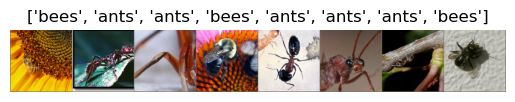

In [14]:
# 학습 데이터로더('train') 이터레이터, 넥스트 가져옴
d_iter = iter(dloaders['train'])

# 이터레이터에서 다음 미니배치(이미지 텐서와 클래스 레이블) 가져옴
imgs, cls = next(d_iter)

# 미니 배치 이미지들을 하나의 격자(grid) 이미지로 만들어 표현
grid = torchvision.utils.make_grid(imgs)

# 격자 이미지와 해당 레이블(cls) 제목 설정 >> 화면에 표시
imageshow(grid, text=[classes[x] for x in cls])

In [15]:
# 전이학습(transfer learning) 함수 정의
def finetune_model(pretrained_model, loss_func, optim, epochs=10):
  # 학습시간 기록
  start = time.time()

  # 현재 모델의 가중치(state_dict)를 깊은 복사 > 초기상태 저장
  model_weights = copy.deepcopy(pretrained_model.state_dict())

  # 검증 정확도 추적을 위한 변수를 0.0 초기화
  accuracy = 0.0

  # 지정된 epochs 수 만큼 반복하여 학습을 진행함.
  for e in range(epochs):
    # 현재 에폭 진행 상황 출력
    print(f'epoch_number {e} / {epochs-1}')
    print('='*20)

    # 현재 에폭 내에서 학습 데이터 셋과 검증 데이터 셋 순환
    for dset in ['train', 'val']:
      if dset == 'train':
        pretrained_model.train()
        # 모델을 학습 모드로 설정(예: Dropout, BatchNorm 활성화)

      else:
        pretrained_model.eval()
        # 평가 모드 (예: Dropout, BatchNorm 비활성화)(**)

      # 에폭 별 손실과 성공횟수 0.0 초기화
      loss = 0.0
      successes = 0

      # 학습 또는 검증 데이터 로더 순회
      for imgs, tgts in dloaders[dset]:
          # 입력 이미지, 정답 레이블 >> 설정된 device로 이동
          imgs = imgs.to(dvc)
          tgts = tgts.to(dvc)

          optim.zero_grad()

          # 학습 모드('train') 에서만 gradient 변화도 계산을 활성화함
          with torch.set_grad_enabled(dset == 'train'):
              ops = pretrained_model(imgs)
              # 순전파 수행, 예측 결과(ops)얻음
              _, preds = torch.max(ops, 1)
              # 예측 결과에서 모델이 예측한 클래스(preds) 찾음(최대값이 있던 위치 indices)
              # _ : 최대값(value) : 우리 안 쓸거야(필요없어)
              loss_curr = loss_func(ops, tgts)
              # 현재 미니배치에 대한 손실 계산

              # 학습 모드('train')인 경우에만 역전파, 가중치 업데이트 수행함
              if dset == 'train':
                loss_curr.backward()
                optim.step()

          # 배치 손실을 전체 에폭 손실에 누적
          # >> 이미지 개수를 곱해서 평균 손실이 아닌 총 손실을 누적함
          loss += loss_curr.item() * imgs.size(0)
          # loss_curr : 현재 미니배치의 평균 loss 값
          # .item() >> 파이선 숫자(float)
          # imgs.size(0) : batch_size (현재 배치 내 이미지 개)

          # 예측과 정답과 일치하는 개수 세어서 성공 횟수를 누적함
          successes += torch.sum(preds == tgts.data)

      # 에폭이 끝난 후, 전체 손실을 데이터 셋 나누어서 평균 에폭 손실 계산
      loss_epoch = loss / dset_sizes[dset]
      # dset_sizes[dset] 데이터 셋(dset)의 전체 크기(총 샘풀 수)
      # 전체 성공횟수를 데이터 셋 나누어서 에폭 정확도를 계산함
      accuracy_epoch = successes.double() / dset_sizes[dset]
      # .double() 텐서의 데이터 타입을 부동소수점

      print(f'{dset} loss in this epoch: {loss_epoch}, accuracy in this epoch: {accuracy_epoch}')

      # 현재 검증 정확도가 지금까지 최고 정확도 보다 높으면
      if dset == 'val' and accuracy_epoch > accuracy:
          accuracy = accuracy_epoch
          model_weights = copy.deepcopy(pretrained_model.state_dict())
      print()

  # 학습 종료시간 계산 >> 총 소요시간 출력
  time_delta = time.time() - start
  print(f'Training fished in {time_delta // 60}mins {time_delta % 60}secs')
  print(f'Best accuracy: {accuracy}')

  # 최고 성능 보였던 시점의 모델 가중치(model_weights) 를 모델에 로드함
  pretrained_model.load_state_dict(model_weights)

  return pretrained_model

In [ ]:
# 모델의 예측결과 시각화 하는 함수 정의
# pretrained_model : 사전학습된 모델, max_num_imgs : 표시할 최대 이미지 수 입력받음

def visualize_predictions(pretrained_model, max_num_imgs=4):
    torch.manual_seed(1) # 난수 생성기 seed 설정

    # 모델의 원래 학습 모드 상태 (True/False) 저장
    was_model_training = pretrained_model.training
    # 모델이 현재 train() 상태인지 eval() 상태인지 기록
    # >> 함수 종료된 뒤에 원래 상태로 복구하기 위해서

    # 모델을 평가 모드로 설정
    pretrained_model.eval()

    # 시각화할 이미지 카운터 0으로 초기화
    imgs_counter = 0

    # 그림 객체 생성
    fig = plt.figure()

    # gradient 계산 비 활성화
    with torch.no_grad():
      # 검증 데이터 로더('val') 순회
      for i, (imgs, tgts) in enumerate(dloaders['val']):
        # 입력 이미지, 정답 레이블 >> 설정된 device로 이동
        imgs = imgs.to(dvc)
        tgts = tgts.to(dvc)

        ops = pretrained_model(imgs)
        _, preds = torch.max(ops,1)

        # 현재 배치 내에서 모든 이미지에 대해 순회
        for j in range(imgs.size()[0]):
          imgs_counter += 1

          ax = plt.subplot(max_num_imgs//2, 2, imgs_counter) # 호출될 때에 그 칸을 가르킴
          # (default) max_num_imgs=4 >> (2,2)
          ax.axis('off')

          ax.set_title(f'pred: {classes[preds[j]]} || target: {classes[tgts[j]]}')

          # 역정규화된 이미지를 화면에 표시
          imageshow(imgs.cpu().data[j])

          # 설정된 최대 이미지 수에 도달한다면
          if imgs_counter == max_num_imgs:
             pretrained_model.train(mode=was_model_training)
             #  모델의 모드를 원래 상태로 되돌려라
             return
             # 함수 실행 종료
      pretrained_model.train(mode=was_model_training)
      #  loop를 끝까지 실행했다면 모델의 모드를 원래 상태로 돌려놓아요

In [17]:
# torchvision.models 에서 alexnet 모델 불러옴
# pretrained=True 설정 ImageNet 데이터셋으로 미리 학습된 가중치 로드함

model_finetuned = models.alexnet(pretrained=True) # deprecated soon (chagned to 'weights')

# 로드된 alexnet 모델의 특징추출기(Convolution layer) 부분인 feature 모듈의 구조 출력
print(model_finetuned.features)

/home/kim/miniconda3/envs/yolo_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kim/miniconda3/envs/yolo_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/kim/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:04<00:00, 56.5MB/s] 


Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [18]:
print(model_finetuned.classifier)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [19]:
model_finetuned = models.alexnet(pretrained=True)
# 기존 1,000개 클래스 >> 현재 데이터 셋 클래스 개수(2개, 벌/개미) 변경
# 기존 분류기 마지막 레이어 classifier[6] (인덱스 6) 수정
model_finetuned.classifier[6] = nn.Linear(4096, 2)

In [20]:
# 손실함수 cross entropy 정의
loss_func = nn.CrossEntropyLoss()

# optimizer 정의
optim_finetune = optim.SGD(model_finetuned.parameters(), lr=0.0001)

model_finetuned = model_finetuned.to(dvc)

model_finetune = finetune_model(model_finetuned, loss_func, optim_finetune)
model_finetune

epoch_number 0 / 9
train loss in this epoch: 0.7131185424132426, accuracy in this epoch: 0.5327868852459017

val loss in this epoch: 0.5850885911704669, accuracy in this epoch: 0.6666666666666667

epoch_number 1 / 9
train loss in this epoch: 0.5882998235890122, accuracy in this epoch: 0.6721311475409837

val loss in this epoch: 0.4878217351982017, accuracy in this epoch: 0.7908496732026145

epoch_number 2 / 9
train loss in this epoch: 0.4753811901710073, accuracy in this epoch: 0.778688524590164

val loss in this epoch: 0.4318630089557249, accuracy in this epoch: 0.8431372549019608

epoch_number 3 / 9
train loss in this epoch: 0.422299079719137, accuracy in this epoch: 0.819672131147541

val loss in this epoch: 0.39697980822301376, accuracy in this epoch: 0.8562091503267975

epoch_number 4 / 9
train loss in this epoch: 0.4224260493380124, accuracy in this epoch: 0.8565573770491803

val loss in this epoch: 0.37300930030984814, accuracy in this epoch: 0.8758169934640523

epoch_number 5 /

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

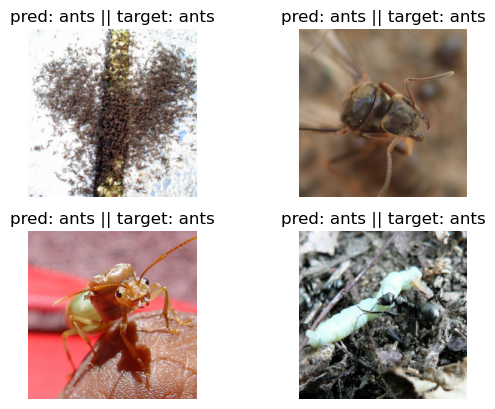

In [21]:
visualize_predictions(model_finetune)

In [19]:
# eos